# Read dataset
Classes:
* 0: Flooded
* 1: Non-flooded

In [ ]:
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
from PIL import Image

In [ ]:
from google.colab import drive

drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
transform = transforms.Compose(
    [transforms.Resize((256, 256)), 
     transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

train_dataSet = torchvision.datasets.ImageFolder(root='/content/drive/MyDrive/SI_flood_dataset/dataset/SI_flood_dataset_split/train', transform=transform) 
test_dataSet = torchvision.datasets.ImageFolder(root='/content/drive/MyDrive/SI_flood_dataset/dataset/SI_flood_dataset_split/val', transform=transform) 


torch.Size([3, 256, 256])
label:  0
Number of images in augmented_dataSet_train:  736
Number of images in augmented_dataSet_test:  186


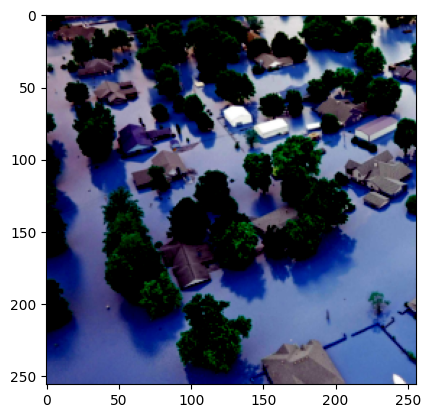

In [ ]:
# show one of the images
print(train_dataSet[0][0].shape)
print('label: ',train_dataSet[0][1])
plt.imshow(train_dataSet[0][0].permute(1, 2, 0))

# print total number of images in train_dataSet and augmented_dataSet_test
print('Number of images in augmented_dataSet_train: ', len(train_dataSet))
print('Number of images in augmented_dataSet_test: ', len(test_dataSet))

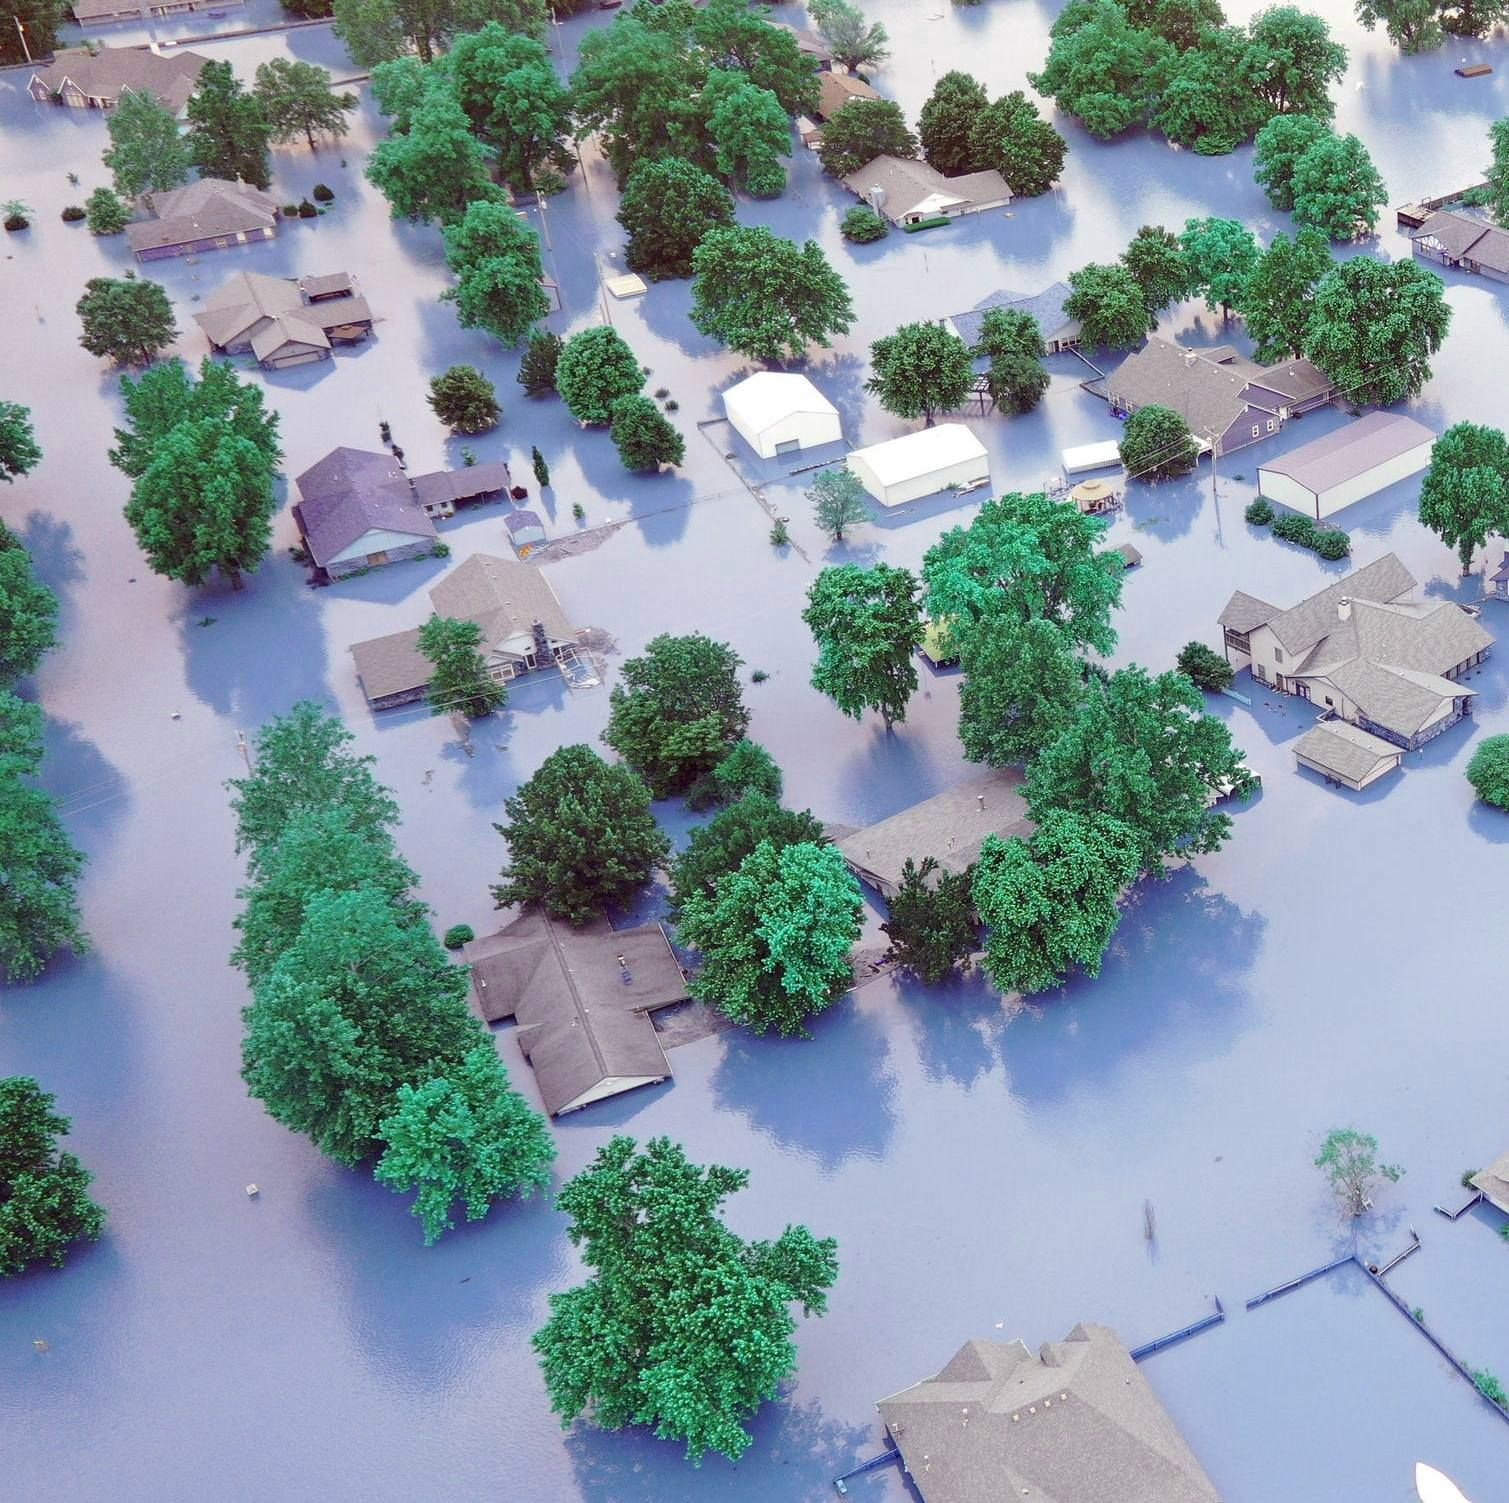

In [ ]:
# Define the path to the image file
image_path = '/content/drive/MyDrive/SI_flood_dataset/dataset/SI_flood_dataset_split/train/flooded/0.jpg'

# Open the image
image = Image.open(image_path)

# Display the image
image.show()

# Data augmentation
Increase number of data by adding rotated images to the dataset

In [ ]:
# Define the transformation
transform_augmented = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(degrees=90),
    transforms.Resize((256, 256)),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

# Apply the transformation to the image
# transformed_image = transform(image)
augmented_dataSet_train = torchvision.datasets.ImageFolder(root='/content/drive/MyDrive/SI_flood_dataset/dataset/SI_flood_dataset_split/train', transform=transform_augmented) 
augmented_dataSet_test = torchvision.datasets.ImageFolder(root='/content/drive/MyDrive/SI_flood_dataset/dataset/SI_flood_dataset_split/val', transform=transform_augmented) 


torch.Size([3, 256, 256])
label:  0


Number of images in augmented_dataSet_train:  736
Number of images in augmented_dataSet_test:  186


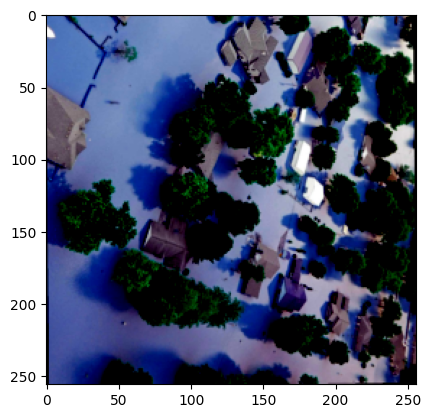

In [ ]:
# show one of the images
print(augmented_dataSet_train[0][0].shape)
print('label: ',augmented_dataSet_train[0][1])
plt.imshow(augmented_dataSet_train[0][0].permute(1, 2, 0))

# print total number of images in augmented_dataSet_train and augmented_dataSet_test
print('Number of images in augmented_dataSet_train: ', len(augmented_dataSet_train))
print('Number of images in augmented_dataSet_test: ', len(augmented_dataSet_test))

In [ ]:
augmented_train = augmented_dataSet_train + train_dataSet
augmented_test = augmented_dataSet_test + test_dataSet

print('Number of images in augmented_dataSet_train: ', len(augmented_train))
print('Number of images in augmented_dataSet_test: ', len(augmented_test))

Number of images in augmented_dataSet_train:  1472
Number of images in augmented_dataSet_test:  372


# Contrast enhancement

Brightening -> bad

In [ ]:
from PIL import Image, ImageEnhance

# Load the blurred image
img = Image.open("/content/drive/MyDrive/SI_flood_dataset/dataset/SI_flood_dataset_split/train/flooded/24.jpg")

# Increase the brightness of the image
enhancer = ImageEnhance.Brightness(img)
bright_img = enhancer.enhance(1.5)

# Save the brightened image
bright_img.save("brightened_image.jpg")

histogram equalization -> good

In [37]:
from skimage import io, exposure
import numpy as np

# Flooded
# Load the image
image_flooded = io.imread("/content/drive/MyDrive/SI_flood_dataset/dataset/SI_flood_dataset_split/train/flooded/8.jpg")

# Perform histogram equalization
image_eq_flooded = exposure.equalize_hist(image_flooded)

# Save the equalized image
# io.imsave("flooded_39_equalized_image.jpg", image_eq_flooded)

image_flooded1 = io.imread("/content/drive/MyDrive/SI_flood_dataset/dataset/SI_flood_dataset_split/train/flooded/0.jpg")

# Perform histogram equalization
image_eq_flooded1 = exposure.equalize_hist(image_flooded1)

# Save the equalized image
# io.imsave("flooded_0_equalized_image.jpg", image_eq_flooded1)

# non-flooded
# Load the image
image_non_flooded = io.imread("/content/drive/MyDrive/SI_flood_dataset/dataset/SI_flood_dataset_split/train/non-flooded/578.jpg")

# Perform histogram equalization
image_eq_non_flooded = exposure.equalize_hist(image_non_flooded)

# Save the equalized image
# io.imsave("non_flooded_580_equalized_image.jpg", image_eq_non_flooded)

eq_diff = np.abs(np.mean(image_eq_flooded) - np.mean(image_eq_non_flooded))
print(f"The difference in mean equalization between flooded and non-flooded images is {eq_diff}")

eq_diff1 = np.abs(np.mean(image_eq_flooded) - np.mean(image_eq_flooded1))
print(f"The difference in mean equalization between 2 flooded images is {eq_diff1}")

The difference in mean equalization between flooded and non-flooded images is 0.0025035434694503644
The difference in mean equalization between 2 flooded images is 0.002814350400440535


Adaptive Histogram Equalization -> bad

In [36]:
import cv2

# flooded
# Load the image
img_flooded = cv2.imread('/content/drive/MyDrive/SI_flood_dataset/dataset/SI_flood_dataset_split/train/flooded/8.jpg', cv2.IMREAD_GRAYSCALE)

# Apply adaptive histogram equalization
clahe_flooded = cv2.createCLAHE(clipLimit=0.05, tileGridSize=(4,4))
# clipLimit parameter controls the amount of contrast enhancement
# tileGridSize parameter controls the size of the tiles used for the histogram equalization.

img_eq_flooded = clahe_flooded.apply(img_flooded)

# Save the equalized image
# cv2.imwrite('adaptive_histo_eq.jpg', img_eq)

# Load the image
img_flooded1 = cv2.imread('/content/drive/MyDrive/SI_flood_dataset/dataset/SI_flood_dataset_split/train/flooded/0.jpg', cv2.IMREAD_GRAYSCALE)

# Apply adaptive histogram equalization
clahe_flooded1 = cv2.createCLAHE(clipLimit=0.05, tileGridSize=(4,4))
# clipLimit parameter controls the amount of contrast enhancement
# tileGridSize parameter controls the size of the tiles used for the histogram equalization.

img_eq_flooded1 = clahe_flooded.apply(img_flooded1)

# Save the equalized image
# cv2.imwrite('adaptive_histo_eq.jpg', img_eq)

# non-flooded
# Load the image
img_nonflooded = cv2.imread('/content/drive/MyDrive/SI_flood_dataset/dataset/SI_flood_dataset_split/train/non-flooded/578.jpg', cv2.IMREAD_GRAYSCALE)

# Apply adaptive histogram equalization
clahe_nonflooded = cv2.createCLAHE(clipLimit=0.05, tileGridSize=(4,4))
# clipLimit parameter controls the amount of contrast enhancement
# tileGridSize parameter controls the size of the tiles used for the histogram equalization.

image_eq_non_flooded = clahe_nonflooded.apply(img_nonflooded)

# Save the equalized image
# cv2.imwrite('adaptive_histo_eq.jpg', img_eq)
clahe_eq_diff = np.abs(np.mean(img_eq_flooded) - np.mean(image_eq_non_flooded))
print(f"The difference in mean equalization between flooded and non-flooded images is {clahe_eq_diff}")

clahe_eq_diff1 = np.abs(np.mean(img_eq_flooded) - np.mean(img_eq_flooded1))
print(f"The difference in mean equalization between 2 flooded images is {clahe_eq_diff1}")

The difference in mean equalization between flooded and non-flooded images is 32.34011536231773
The difference in mean equalization between 2 flooded images is 45.403425150122615


Contrast Limited Adaptive Histogram Equalization (CLAHE) -> good

In [38]:
from skimage import exposure, io

# Load the image
image = io.imread("/content/drive/MyDrive/SI_flood_dataset/dataset/SI_flood_dataset_split/train/flooded/39.jpg")

# Apply CLAHE
img_eq = exposure.equalize_adapthist(image, clip_limit=0.03)

# Save the equalized image
# io.imsave('cotrastLimit_adaptive_histo_eq.jpg', img_eq)

# Load the image
image1 = io.imread("/content/drive/MyDrive/SI_flood_dataset/dataset/SI_flood_dataset_split/train/flooded/0.jpg")

# Apply CLAHE
img_eq1 = exposure.equalize_adapthist(image1, clip_limit=0.03)

# Save the equalized image
# io.imsave('cotrastLimit_adaptive_histo_eq.jpg', img_eq1)

# Load the image
image_nonflooded = io.imread("/content/drive/MyDrive/SI_flood_dataset/dataset/SI_flood_dataset_split/train/non-flooded/578.jpg")

# Apply CLAHE
img_eq_nonflooded = exposure.equalize_adapthist(image_nonflooded, clip_limit=0.03)

# Save the equalized image
# io.imsave('cotrastLimit_adaptive_histo_eq.jpg', img_eq_nonflooded)

# difference in mean equalization between flooded and non-flooded images
eq_diff = np.abs(np.mean(img_eq) - np.mean(img_eq_nonflooded))
print(f"The difference in mean equalization between flooded and non-flooded images is {eq_diff}")

# difference in mean equalization between 2 flooded images
eq_diff1 = np.abs(np.mean(img_eq) - np.mean(img_eq1))
print(f"The difference in mean equalization between 2 flooded images is {eq_diff1}")

The difference in mean equalization between flooded and non-flooded images is 0.057505134472953856
The difference in mean equalization between 2 flooded images is 0.0842173796086001


Take the CLAHE contrast enhancement and apply it on all images and save them in the drive

In [43]:
import os
directories = ['train/flooded/', 'train_eq/flooded/', 
               'train/non-flooded/', 'train_eq/non-flooded/',
               'val/flooded/', 'val_eq/flooded/',
               'val/non-flooded/', 'val_eq/non-flooded/']

for i in range(0, len(directories), 2):
    data_dir = '/content/drive/MyDrive/SI_flood_dataset/dataset/SI_flood_dataset_split/' + directories[i]

    for img in os.listdir(data_dir): 
        image = io.imread(data_dir + img)
        img_eq = exposure.equalize_adapthist(image, clip_limit=0.03)
        io.imsave('/content/drive/MyDrive/SI_flood_dataset/dataset/SI_flood_dataset_split/' + directories[i+1] + img, img_eq)


# De-noising

# Image segmetation (for coloring regions of flooding)
* Edge detection
* Thresholding
* Clustering

Thresholding

In [ ]:
import cv2

# Load the image
img = cv2.imread('/content/drive/MyDrive/SI_flood_dataset/dataset/SI_flood_dataset_split/train/flooded/47.jpg')

# Convert to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Apply thresholding
thresh_value = 100
ret, thresh = cv2.threshold(gray, thresh_value, 255, cv2.THRESH_BINARY)

# Save the thresholded image
cv2.imwrite("segmentation_thresh.jpg", thresh)

True

Edge Detection

In [ ]:
import cv2

# Load the image
img = cv2.imread('/content/drive/MyDrive/SI_flood_dataset/dataset/SI_flood_dataset_split/train/flooded/47.jpg')

# Convert to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Apply Canny edge detection
edges = cv2.Canny(gray, 100, 200)

# Save the edge image
cv2.imwrite("segmentation_edges.jpg", edges)

True

Clustering: k-means

In [ ]:
from skimage import io, color
from sklearn.cluster import KMeans

# Load the image
img = io.imread('/content/drive/MyDrive/SI_flood_dataset/dataset/SI_flood_dataset_split/train/flooded/47.jpg')

# Convert to LAB color space
lab = color.rgb2lab(img)

# Reshape to 2D array
h, w = lab.shape[:2]
lab_2d = lab.reshape((h*w, 3))

# Perform k-means clustering
k = 2
kmeans = KMeans(n_clusters=k, random_state=0).fit(lab_2d)
labels = kmeans.labels_.reshape((h, w))

# Create a mask of the flood region
flood_mask = labels == 1

# Dilate the mask to include nearby pixels
from skimage.morphology import disk, binary_dilation
selem = disk(5)
flood_mask = binary_dilation(flood_mask, selem)

# Apply the mask to the original image
flooded_img = img.copy()
flooded_img[~flood_mask] = 0

# Save the flooded image and mask
io.imsave("segmentation_clusterig_kmeans.jpg", flooded_img)
io.imsave("segmentation_clusterig_kmeans_mask.jpg", flood_mask)

Threshold otsu

In [ ]:
from skimage import io, color, filters
import numpy as np

# Load the image
img = io.imread('/content/drive/MyDrive/SI_flood_dataset/dataset/SI_flood_dataset_split/train/flooded/47.jpg')

# Convert to grayscale
gray = color.rgb2gray(img)

# Perform Otsu's thresholding
threshold = filters.threshold_otsu(gray)
mask = gray > threshold

# Dilate the mask to include nearby pixels
from skimage.morphology import disk, binary_dilation
selem = disk(5)
mask = binary_dilation(mask, selem)

# Apply the mask to the original image
flooded_img = img.copy()
flooded_img[~mask] = 0

# Save the flooded image and mask
io.imsave("segmentation_clusterig_isodata.jpg", flooded_img)
io.imsave("segmentation_clusterig_isodata_mask.jpg", mask)

<ipython-input-13-01f51b1cd3ce>:25: UserWarning: segmentation_clusterig_isodata_mask.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  io.imsave("segmentation_clusterig_isodata_mask.jpg", flood_mask)


Clustering: ISOData -> didn't run it yet

In [ ]:
import numpy as np
import random

class Cluster:
    def __init__(self, center):
        self.center = center
        self.points = []
    
    def update_center(self):
        if len(self.points) > 0:
            self.center = np.mean(self.points, axis=0)

class ISODATA:
    def __init__(self, data, k, max_clusters, min_points, max_variance, max_iterations):
        self.data = data
        self.k = k
        self.max_clusters = max_clusters
        self.min_points = min_points
        self.max_variance = max_variance
        self.max_iterations = max_iterations

    def initialize_clusters(self):
        # Define parallelepiped region in feature space
        min_values = [min(feature) for feature in self.data.T]
        max_values = [max(feature) for feature in self.data.T]
        region = [(min_values[i], max_values[i]) for i in range(len(min_values))]
        
        # Choose k points uniformly at random from region as initial means
        self.clusters = []
        for i in range(self.k):
            point = [random.uniform(region[j][0], region[j][1]) for j in range(len(region))]
            self.clusters.append(Cluster(point))
    
    def assign_points_to_clusters(self):
        for cluster in self.clusters:
            cluster.points = []
        for point in self.data:
            distances = [np.linalg.norm(point - cluster.center) for cluster in self.clusters]
            closest_cluster_idx = np.argmin(distances)
            self.clusters[closest_cluster_idx].points.append(point)
    
    def remove_empty_clusters(self):
        self.clusters = [cluster for cluster in self.clusters if len(cluster.points) > 0]
    
    def split_clusters(self):
        new_clusters = []
        for cluster in self.clusters:
            if len(cluster.points) > 2 * self.min_points and np.var(cluster.points) > self.max_variance:
                # Split cluster into two new clusters
                indices = random.sample(range(len(cluster.points)), len(cluster.points))
                cluster1_points = [cluster.points[i] for i in indices[:len(indices)//2]]
                cluster2_points = [cluster.points[i] for i in indices[len(indices)//2:]]
                new_cluster1 = Cluster(np.mean(cluster1_points, axis=0))
                new_cluster2 = Cluster(np.mean(cluster2_points, axis=0))
                new_cluster1.points = cluster1_points
                new_cluster2.points = cluster2_points
                new_clusters.append(new_cluster1)
                new_clusters.append(new_cluster2)
            else:
                new_clusters.append(cluster)
        self.clusters = new_clusters
    
    def merge_clusters(self):
        while len(self.clusters) > self.max_clusters:
            distances = np.zeros((len(self.clusters), len(self.clusters)))
            for i, cluster1 in enumerate(self.clusters):
                for j, cluster2 in enumerate(self.clusters):
                    if i != j:
                        distances[i, j] = np.linalg.norm(cluster1.center - cluster2.center)
            min_distance_idx = np.unravel_index(np.argmin(distances), distances.shape)
            self.clusters[min_distance_idx[0]].points += self.clusters[min_distance_idx[1]].points
            self.clusters[min_distance_idx[0]].update_center()
            del self.clusters[min_distance_idx[1]]
    
    def fit(self):
        self.initialize_clusters()
        for i in range(self.max_iterations):
            self.assign_points_to_clusters()
            self.remove_empty_clusters()
            self.split_clusters()
            self.merge_clusters()
            if len(self.clusters) <= self.max_clusters:
                break
        labels = np.zeros(len(self.data))
        for i, cluster in enumerate(self.clusters):
            for point in cluster.points:
                labels[np.where((self.data == point).all(axis=1))] = i
        return labels

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

# Generate sample data
X, y = make_blobs(n_samples=300, centers=4, random_state=0)

# Run ISODATA clustering algorithm
isodata = ISODATA(X, k=4, max_clusters=8, min_points=5, max_variance=0.1, max_iterations=100)
labels = isodata.fit()

# Plot results
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
plt.show()

No need for balancig because the no-flooding and flooding images have the same number (about 500 images) 